In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns # !!!
%matplotlib inline

In [3]:
filepath = "/Users/U/Desktop/CSE343 Machine Learning/Assignments/2022097_HW1/data/Electricity BILL.csv"
df = pd.read_csv(filepath)
df.head()

Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480       76.335921            1.519812   
4                  26.936862       96.511319            1.874753   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                    6                0                     7.211768   
1                   10                0                    34.139492   
2                    2                1                     6.224612   
3                    2                0                     5.327398   
4                   19                0                     7.060854   

     Building_Status Maintenance_Priority  Energy_Per_SqM  \
0  Under Maintenance                 High      174.835708   
1  Under Maintenance                 High      143.086785   
2        Operational               Medium      182.384427   
3             Closed                  Low      226.151493   
4             Closed               Medium      138.292331   

   Number_of_Residents  Electricity_Bill  
0                  360      16408.008770  
1                   91      15230.425070  
2                  115       8117.632795  
3                  159      13030.707160  
4                  258      25848.853740

In [4]:
df.isnull().sum()

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64

clean !

In [5]:
y = df["Electricity_Bill"]
X = df.drop(columns=["Electricity_Bill"])

X.head()

Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480       76.335921            1.519812   
4                  26.936862       96.511319            1.874753   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                    6                0                     7.211768   
1                   10                0                    34.139492   
2                    2                1                     6.224612   
3                    2                0                     5.327398   
4                   19                0                     7.060854   

     Building_Status Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  
0  Under Maintenance                 High      174.835708                  360  
1  Under Maintenance                 High      143.086785                   91  
2        Operational               Medium      182.384427                  115  
3             Closed                  Low      226.151493                  159  
4             Closed               Medium      138.292331                  258

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)
print(X.shape)
print(X_train.shape)

(1250, 15)
(1000, 15)


1. pair plots
2. box plots
3. violin plots
4. count plots
5. correlation heatmap

Important point to note [in pair plots]: The graphs on the diagonals (which end up having same parameter on both axes), are not like the other typical scatter plots. They just help in distribution visualization.

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


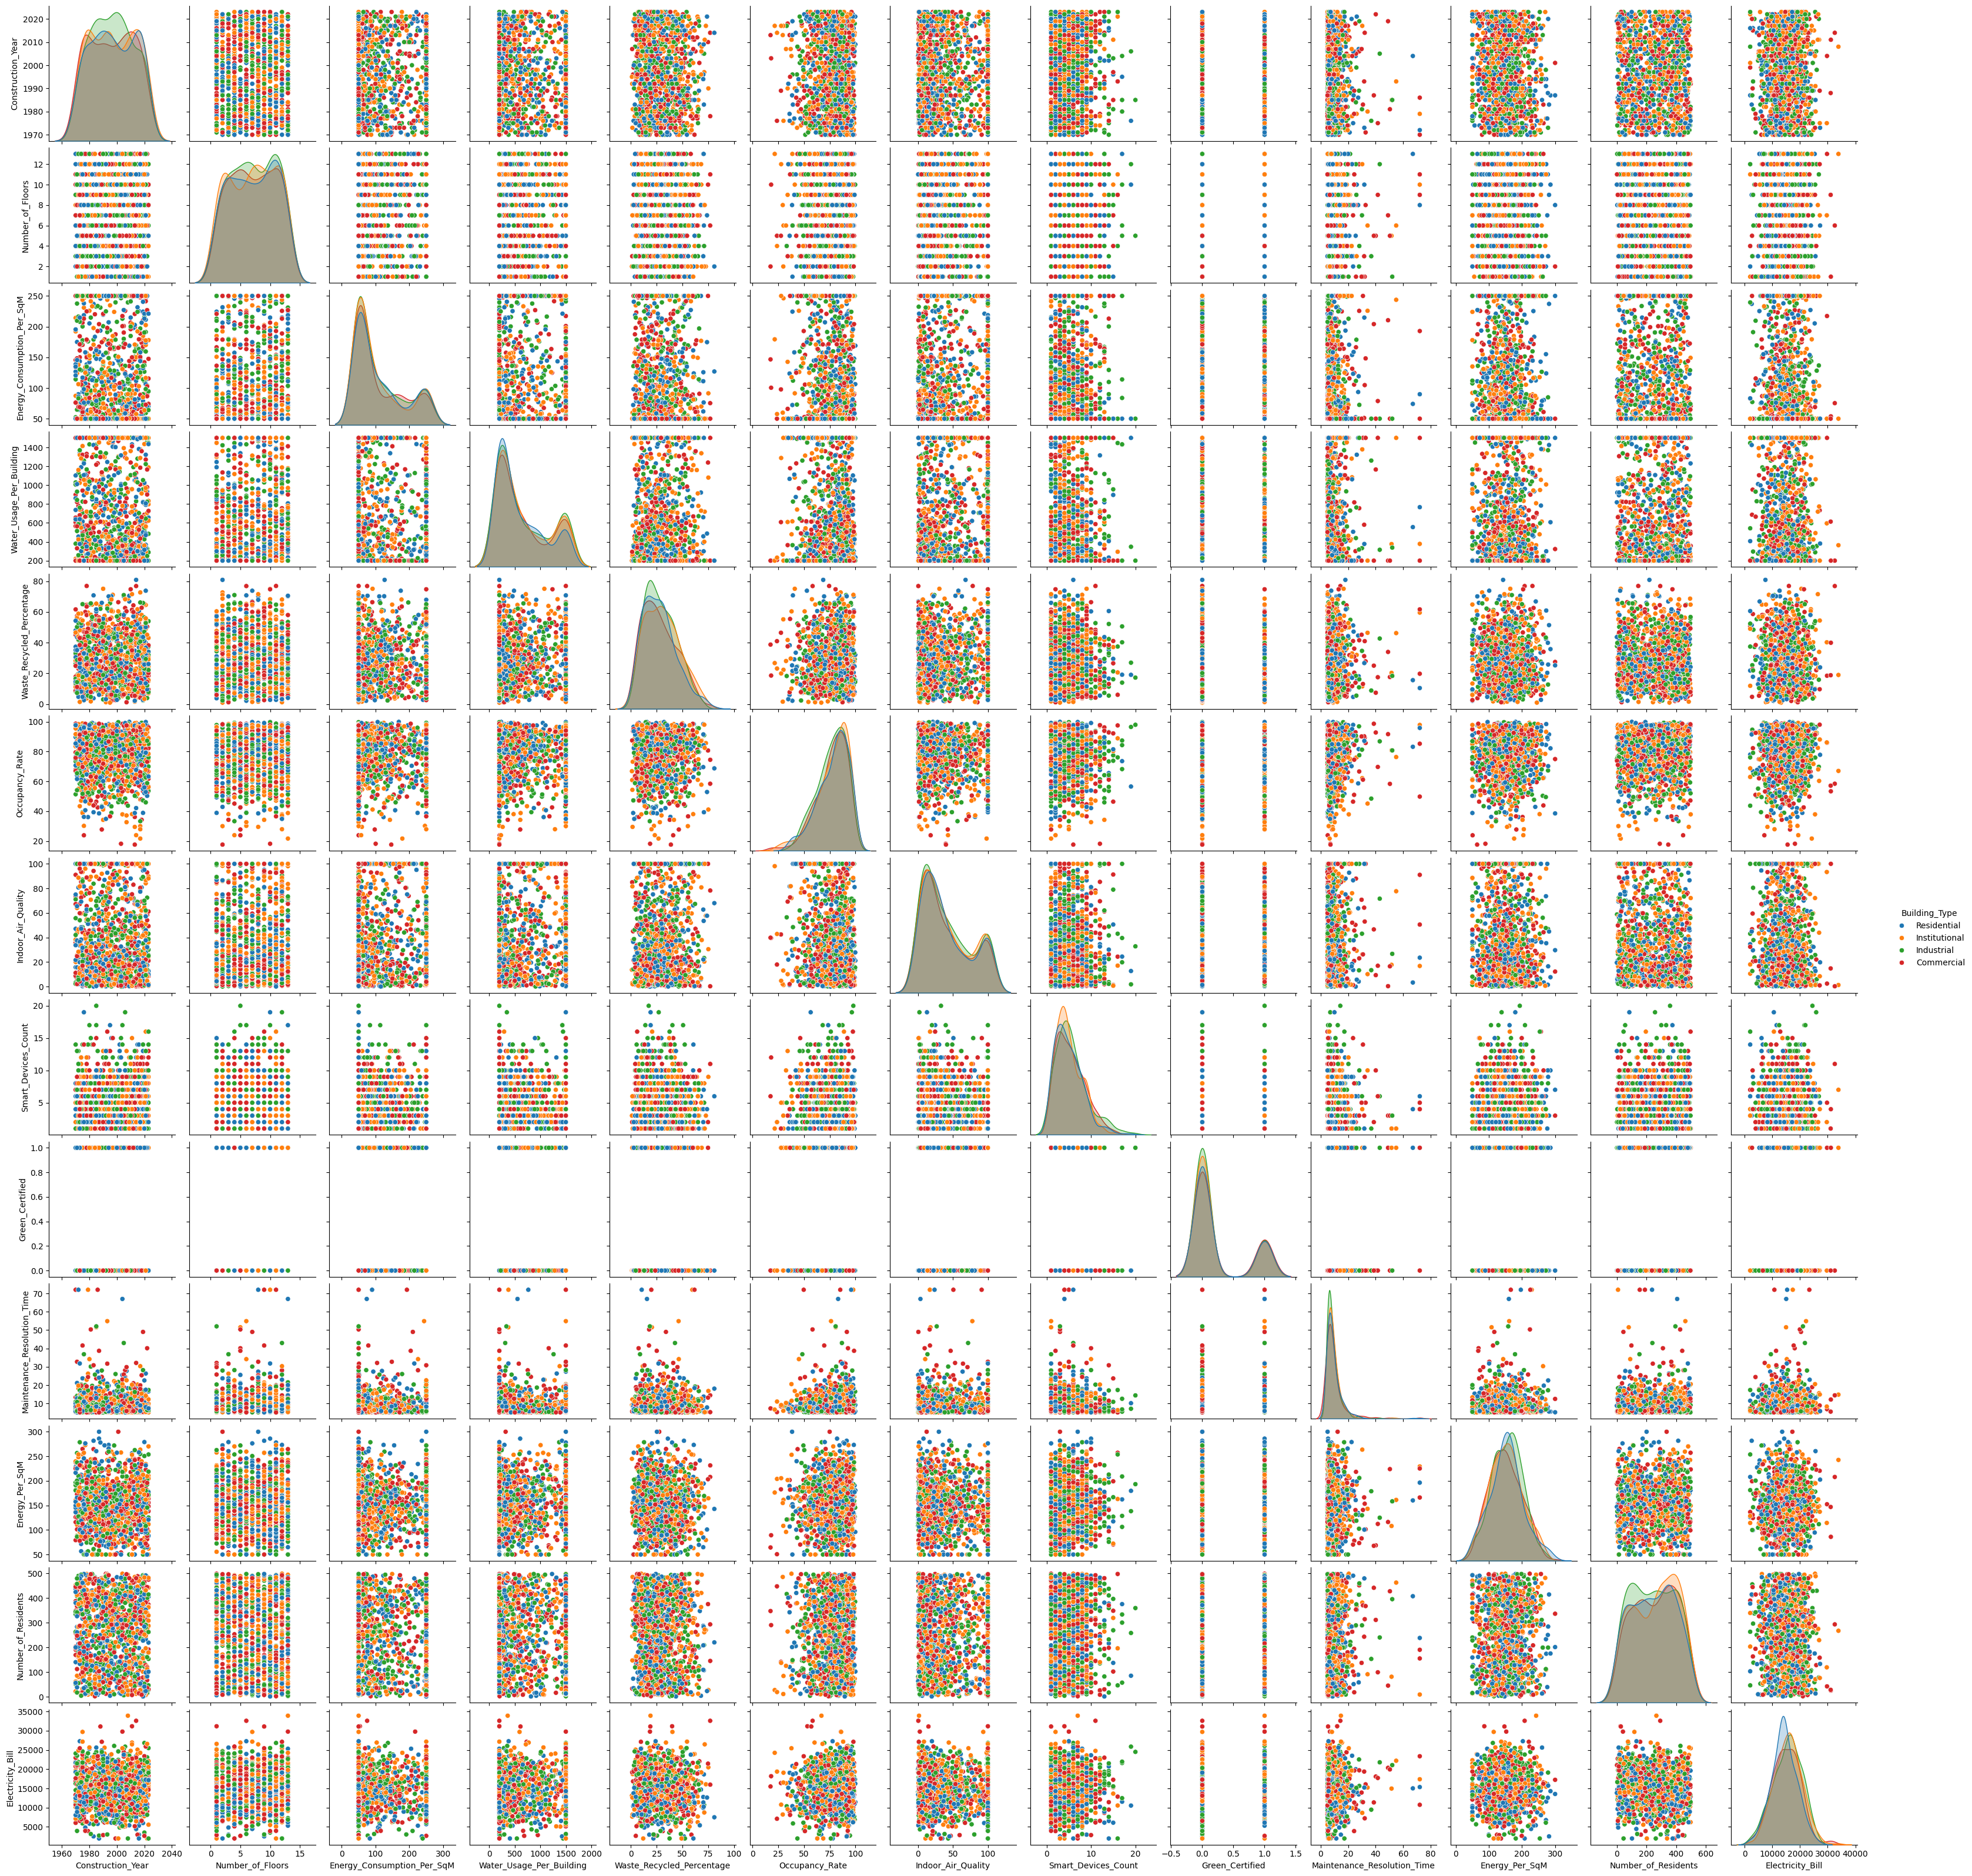

In [7]:
sns.pairplot(df, hue="Building_Type") 
# Each color (hue) represents a different building type [tiny legend is present on the mid-right of the below figure]
plt.show()

Observation:
- `Maintenance_Resolution_Time` appears to have the most number of outliers. Other features are pretty close together and don't seem to have too many outliers. 

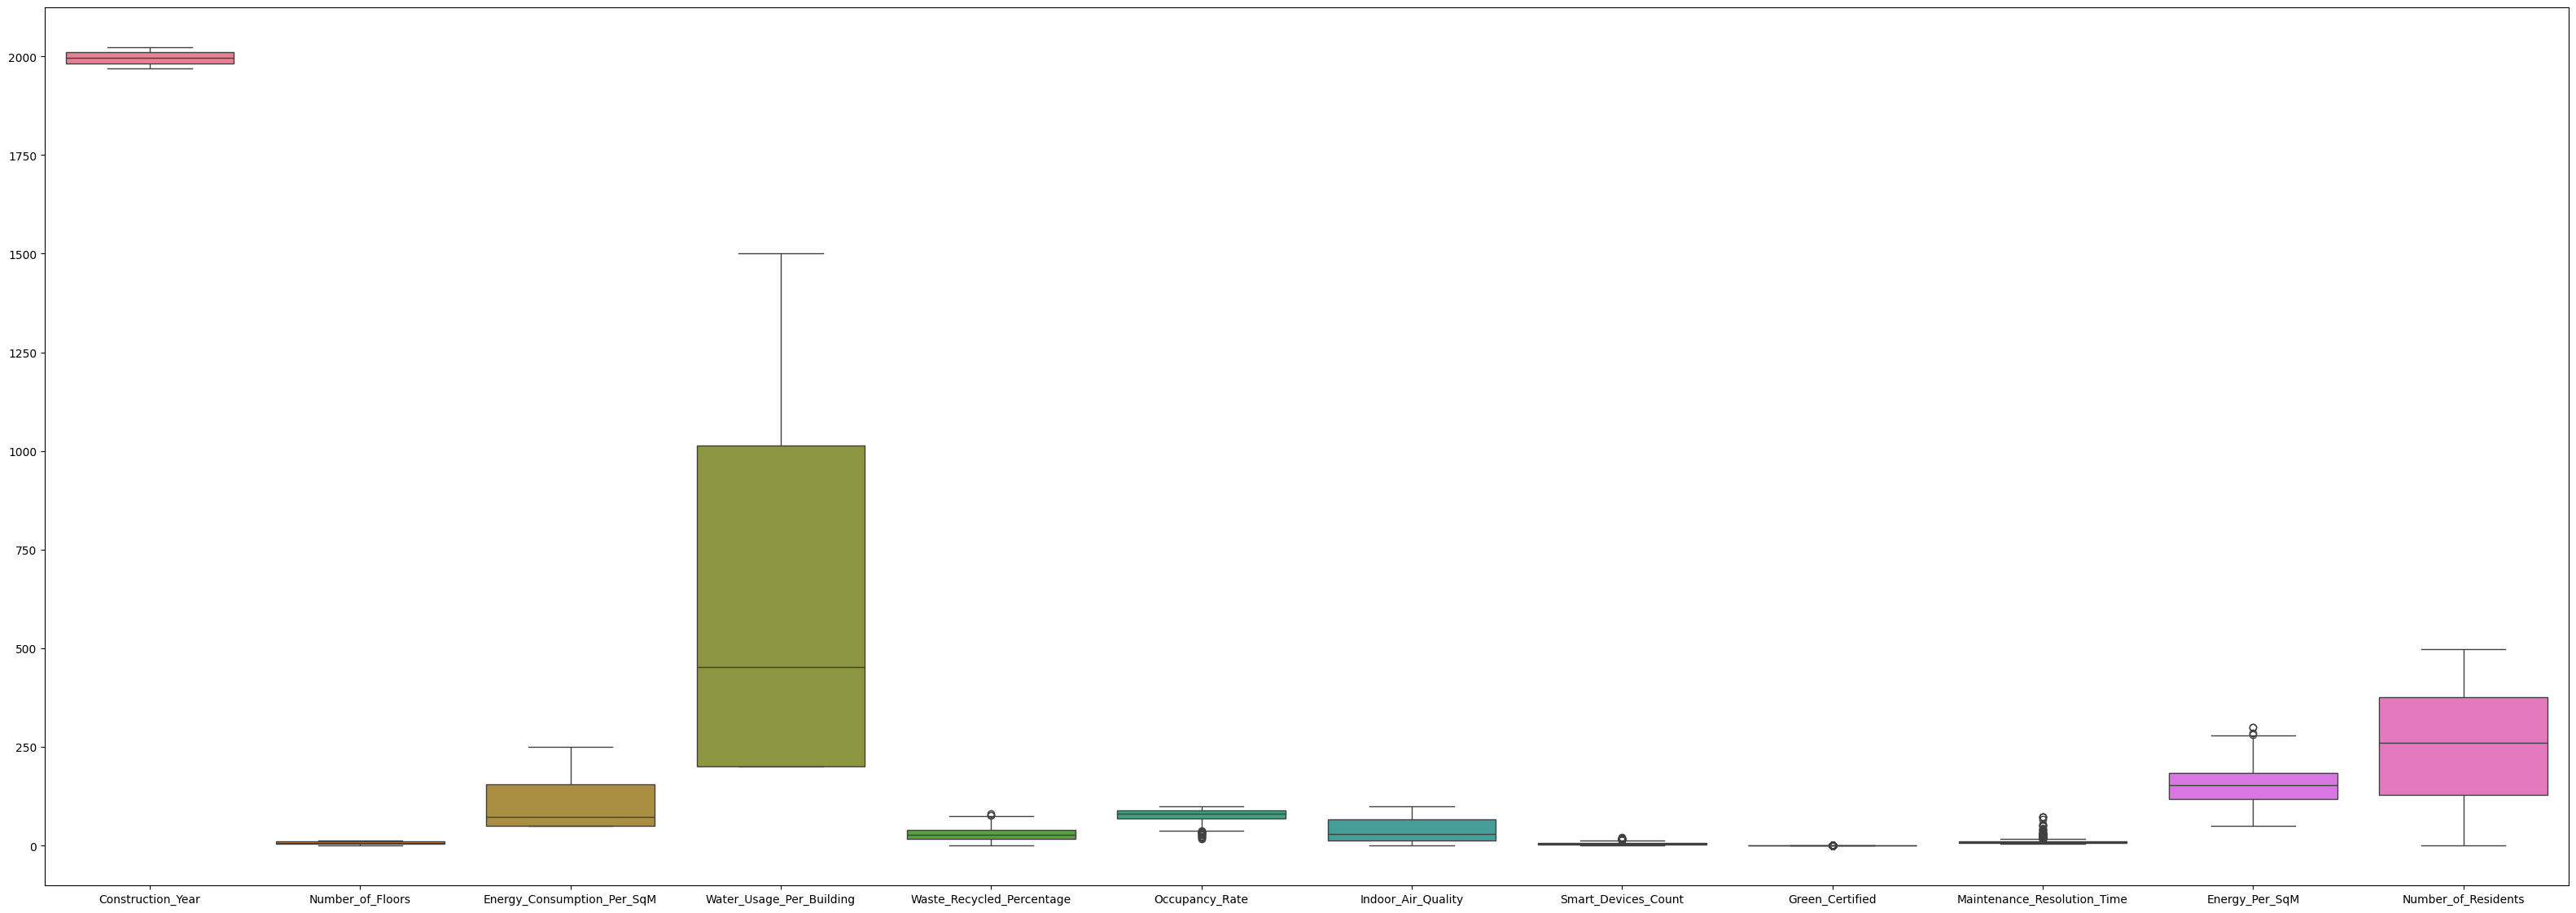

In [8]:
plt.figure(figsize=(40, 14))
sns.boxplot(X)
plt.show()
# The box represents the middle 50% of values

Observation: 
- Co-variance amongst `Water_Usage_Per_Building` and `Number_of_Residents` is the highest. Others are pretty similar. 

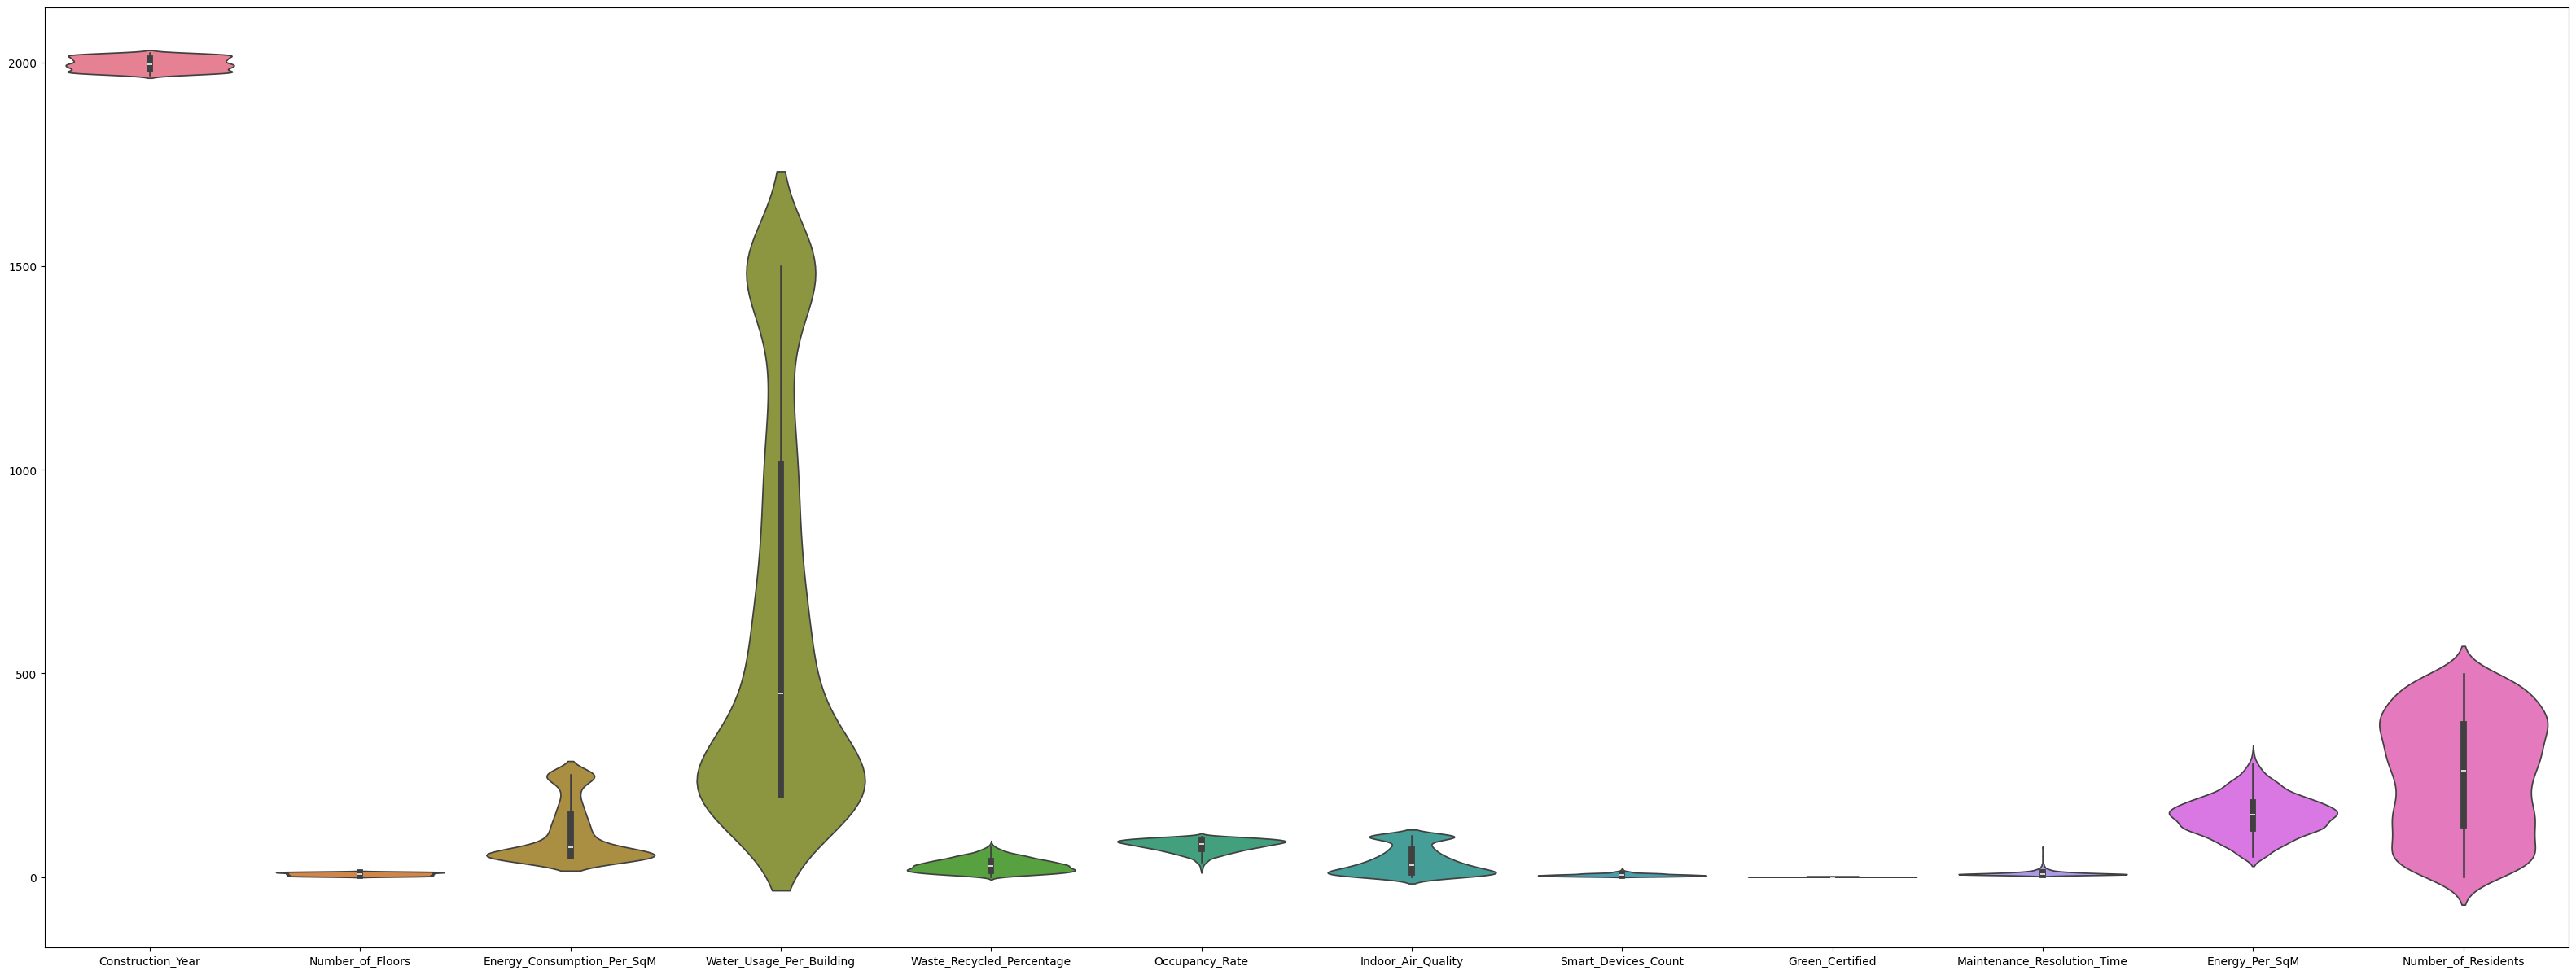

In [9]:
plt.figure(figsize=(40, 15))
sns.violinplot(data=X)
plt.show()

[Reference: GPT4o]

How to Interpret a Violin Plot:
- Shape and Spread: The width of the plot at different values shows where the data is more concentrated (wider areas) and where it is sparse (narrower areas).
- Peaks and Modes: Peaks in the violin plot indicate modes, or where the data has concentrations. This can reveal multimodal distributions, where there are multiple peaks.
- Skewness: Asymmetry in the shape of the violin plot can indicate skewness. For instance, if one side of the plot is wider or longer than the other, the data is skewed in that direction.
- Outliers: Some violin plots may also show individual points for outliers, adding further detail to the visualization.

Observation:
- Similar to in the box plot, the _skewness_ in `Water_Usage_Per_Building` is visible. It has a large gap b/w maximum and minimum, with more concentration towards the minimum.

<Figure size 1400x600 with 0 Axes>

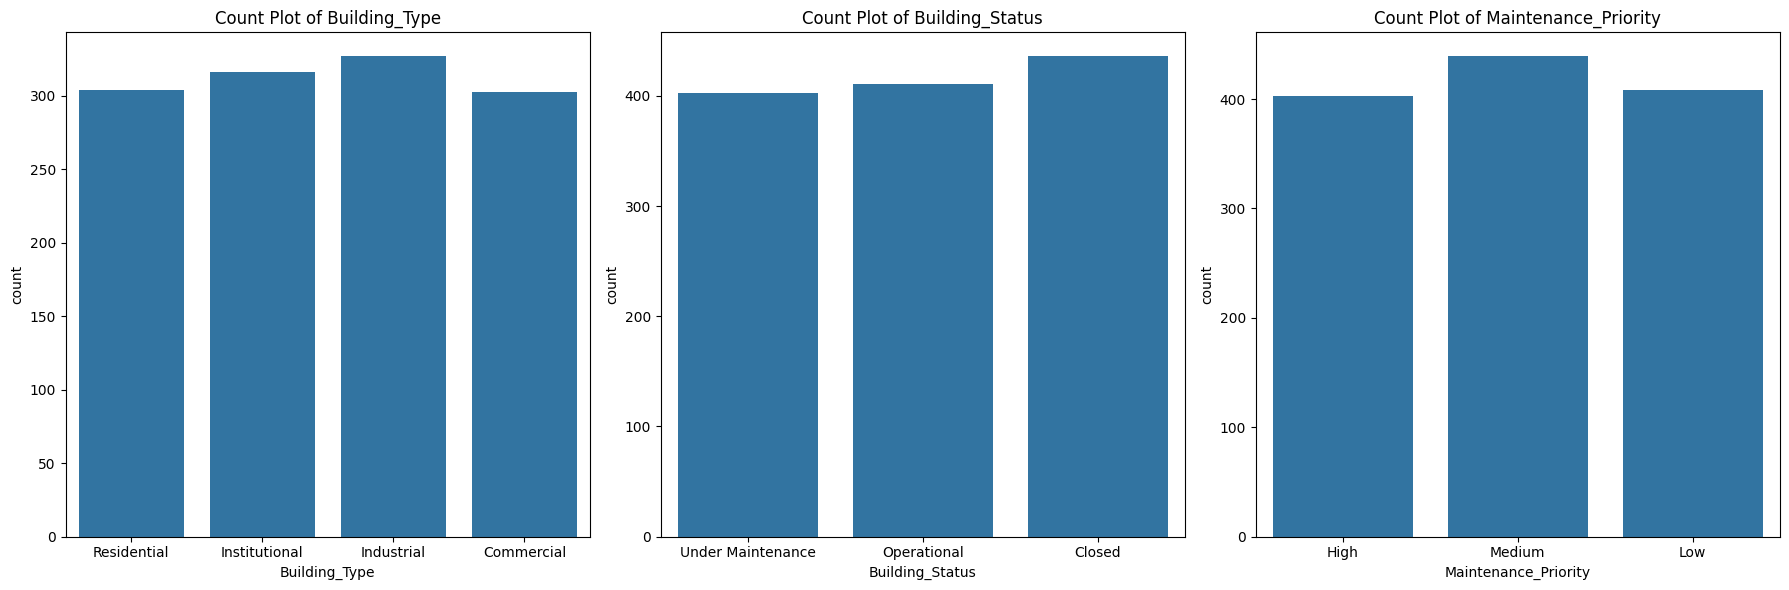

In [10]:
plt.figure(figsize=(14, 6))
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='Building_Type', data=X, ax=axis[0])
axis[0].set_title('Count Plot of Building_Type')
sns.countplot(x='Building_Status', data=X, ax=axis[1])
axis[1].set_title('Count Plot of Building_Status')
sns.countplot(x='Maintenance_Priority', data=X, ax=axis[2])
axis[2].set_title('Count Plot of Maintenance_Priority')
plt.tight_layout()
plt.show()

Observation:
- All categorical variables have similar quantities for each category.

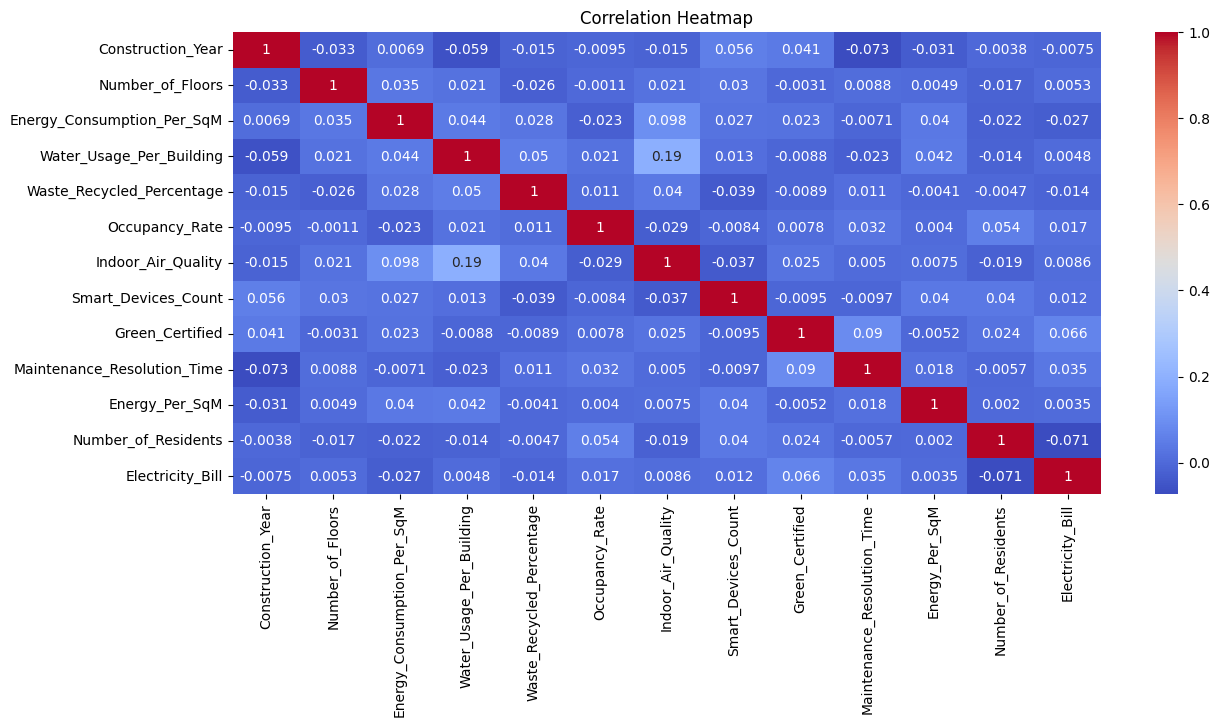

In [11]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 6))
sns.heatmap(df_numerical.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Observation:
- `Indoor_Air_Quality` and `Water_Usage_Per_Building` have a high correlation.

In [12]:
%pip install umap-learn


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\U\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


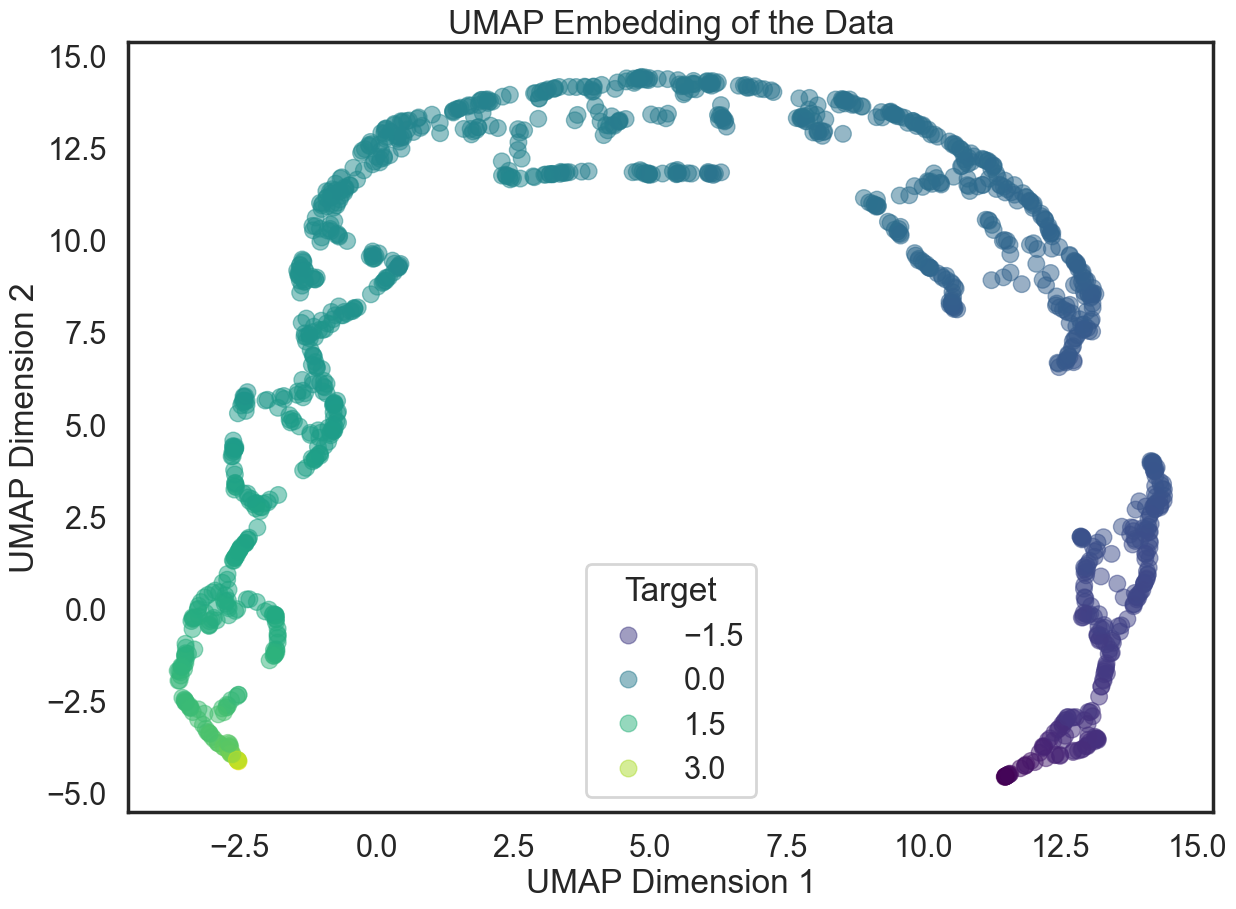

In [41]:
# Uniform Manifold Approximation and Projection
# [Reference: https://umap-learn.readthedocs.io/en/latest/parameters.html]
import umap

# sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
sns.set_theme(style='white', context='poster', rc={'figure.figsize':(14,10)})
fit = umap.UMAP(random_state=42)
categories = df.select_dtypes(include=['object', 'category']).columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns
df_no_categories = df.drop(columns=categories)
u = fit.fit_transform(df_numerical)
umap_df = pd.DataFrame(u, columns = ['UMAP1', 'UMAP2'])
umap_df['Electricity_Bill'] = y
plt.figure(figsize=(14, 10))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Electricity_Bill', palette='viridis', data=umap_df, alpha=0.5, edgecolor=None)
plt.title('UMAP Embedding of the Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Target')
plt.show()

Data seems to seperable as it clusters into 2 clusters, with the bottom right darker cluster appearing seperable from the rest.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

print(df.isnull().sum())
# No missing values
print()

scaler = StandardScaler()
df_train[numerical] = scaler.fit_transform(df_train[numerical])
df_test[numerical] = scaler.transform(df_test[numerical])

# [Reference: GeeksForGeeks]

# Label Encoding
for col in categories:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

X_train_lr = df_train.drop('Electricity_Bill', axis=1) 
y_train_lr = df_train['Electricity_Bill']
X_test_lr = df_test.drop('Electricity_Bill', axis=1)
y_test_lr = df_test['Electricity_Bill']
model = LinearRegression()
model.fit(X_train_lr, y_train_lr)
y_train_pred = model.predict(X_train_lr)
y_test_pred = model.predict(X_test_lr)


def print_eval_train(y_train_lr, y_train_pred):
    print("Train: ")
    mse = mean_squared_error(y_train_lr, y_train_pred)
    print(f"mse = {mse}")
    rmse = np.sqrt(mse)
    print(f"rmse = {rmse}")
    r2 = r2_score(y_train_lr, y_train_pred)
    print(f"r2 = {r2}")
    adjusted_r2 = 1 - (1-r2) * ((len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1))
    print(f"adjusted_r2 = {adjusted_r2}")
    mae = mean_absolute_error(y_train_lr, y_train_pred)
    print(f"mae = {mae}")
    print()
    
def print_eval_test(y_test_lr, y_test_pred):
    print("Test: ")
    mse = mean_squared_error(y_test_lr, y_test_pred)
    print(f"mse = {mse}")
    rmse = np.sqrt(mse)
    print(f"rmse = {rmse}")
    r2 = r2_score(y_test_lr, y_test_pred)
    print(f"r2 = {r2}")
    adjusted_r2 = 1 - (1-r2) * ((len(y_test_lr)-1)/(len(y_test_lr)-X_train_lr.shape[1]-1))
    print(f"adjusted_r2 = {adjusted_r2}")
    mae = mean_absolute_error(y_test_lr, y_test_pred)
    print(f"mae = {mae}")
    print()

print_eval_train(y_train_lr, y_train_pred)
print_eval_test(y_test_lr, y_test_pred)



Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64

Train: 
mse = 0.9860774791553898
rmse = 0.9930143398538562
r2 = 0.01392252084461032
adjusted_r2 = -0.0011091480449534341
mae = 0.8041565546016304

None
Test: 
mse = 0.9781406369408592
rmse = 0.989009927625026
r2 = 3.7344733075483916e-05
adjusted_r2 = -0.06406282547634268
mae = 0.7712544435163373

None


In [57]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_train_lr, y_train_lr)
transforming = X_train_lr.columns[rfe.support_]
X_train_top3 = X_train_lr[transforming]
X_test_top3 = X_test_lr[transforming]
model.fit(X_train_top3, y_train_lr)
y_train_pred_top3 = model.predict(X_train_top3)
y_test_pred_top3 = model.predict(X_test_top3)

print_eval_train(y_train_lr, y_train_pred_top3)
print_eval_test(y_test_lr, y_test_pred_top3)

Train: 
mse = 0.9898654545087161
rmse = 0.9949198231559747
r2 = 0.010134545491284008
adjusted_r2 = -0.00495486692500724
mae = 0.8041856408006224

Test: 
mse = 0.9645790232577828
rmse = 0.9821298403254952
r2 = 0.013901513867941251
adjusted_r2 = -0.04930992755078045
mae = 0.7655416698015712



All the metrics here are worse than in the non Dimensionality Reduced case. This is expected, as by reducing dimensions we lose out on relevant data.

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

# [Reference: ChatGPT]

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categories])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categories))
df_encoded = pd.concat([df.drop(categories, axis=1), encoded_df], axis=1)
train_encoded, test_encoded = train_test_split(df_encoded, train_size=0.8, random_state=42)
X_train_encoded = train_encoded.drop('Electricity_Bill', axis=1)  
y_train_encoded = train_encoded['Electricity_Bill']
X_test_encoded = test_encoded.drop('Electricity_Bill', axis=1)
y_test_encoded = test_encoded['Electricity_Bill']

ridge = Ridge(alpha=0.75)  
ridge.fit(X_train_encoded, y_train_encoded)
y_train_pred_ridge = ridge.predict(X_train_encoded)
y_test_pred_ridge = ridge.predict(X_test_encoded)

print_eval_train(y_train_encoded, y_train_pred_ridge)
print_eval_test(y_test_encoded, y_test_pred_ridge)

Train: 
mse = 0.9878315839920697
rmse = 0.9938971697273665
r2 = 0.01592402629003975
adjusted_r2 = 0.0009228681542172712
mae = 0.805226997116997

Test: 
mse = 0.9859464829658443
rmse = 0.9929483788021632
r2 = -0.00411057733643716
adjusted_r2 = -0.06847663998620868
mae = 0.7741132792585004



Again, all the metrics here are worse than in part (c).

In [61]:
from sklearn.decomposition import FastICA
arr = [4, 5, 6, 8]

for i in arr:
    ica = FastICA(n_components=i, random_state=42)
    X_train_ica = ica.fit_transform(X_train_encoded)
    X_test_ica = ica.transform(X_test_encoded)
    model.fit(X_train_ica, y_train_encoded)
    y_train_pred_ica = model.predict(X_train_ica)
    y_test_pred_ica = model.predict(X_test_ica)

    print(f"For {i} :")
    print_eval_train(y_train_encoded, y_train_pred_ica)
    print_eval_test(y_test_encoded, y_test_pred_ica)


For 4 :
Train: 
mse = 0.9999028452194983
rmse = 0.9999514214298104
r2 = 0.0038986584654121526
adjusted_r2 = -0.011285813204322315
mae = 0.8041754382396554

Test: 
mse = 0.9813862115008198
rmse = 0.9906493887853663
r2 = 0.0005337080204944611
adjusted_r2 = -0.06353464402947373
mae = 0.7722042477782185

For 5 :
Train: 
mse = 0.9957773500200603
rmse = 0.9978864414451477
r2 = 0.00800846905581265
adjusted_r2 = -0.007113353062238925
mae = 0.8047885242323819

Test: 
mse = 0.988090119122627
rmse = 0.9940272225259361
r2 = -0.006293705707169472
adjusted_r2 = -0.07079971248327
mae = 0.7725412575367698

For 6 :
Train: 
mse = 0.9956912372026284
rmse = 0.9978432929085751
r2 = 0.0080942544832443
adjusted_r2 = -0.007026259930120737
mae = 0.8049384215634681

Test: 
mse = 0.9884195179770373
rmse = 0.9941928977703659
r2 = -0.006629173077447925
adjusted_r2 = -0.07115668417215604
mae = 0.7726085790712941

For 8 :
Train: 
mse = 0.995181092274956
rmse = 0.9975876363883807
r2 = 0.008602459904662019
adjusted_r2

The highest number of `i` seems to be giving the lowest Error metrics. Here, `i = 8`

In [63]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # l1_ratio is the mix between L1 and L2
elastic_net.fit(X_train_lr, y_train_lr)
y_train_pred_en = elastic_net.predict(X_train_lr)
y_test_pred_en = elastic_net.predict(X_test_lr)
print_eval_train(y_train_lr, y_train_pred_en)
print_eval_test(y_test_lr, y_test_pred_en)

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)  # l1_ratio is the mix between L1 and L2
elastic_net.fit(X_train_lr, y_train_lr)
y_train_pred_en = elastic_net.predict(X_train_lr)
y_test_pred_en = elastic_net.predict(X_test_lr)
print_eval_train(y_train_lr, y_train_pred_en)
print_eval_test(y_test_lr, y_test_pred_en)

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.8, random_state=42)  # l1_ratio is the mix between L1 and L2
elastic_net.fit(X_train_lr, y_train_lr)
y_train_pred_en = elastic_net.predict(X_train_lr)
y_test_pred_en = elastic_net.predict(X_test_lr)
print_eval_train(y_train_lr, y_train_pred_en)
print_eval_test(y_test_lr, y_test_pred_en)


Train: 
mse = 0.997150731594593
rmse = 0.9985743495577047
r2 = 0.0028492684054071127
adjusted_r2 = -0.01235120006402246
mae = 0.8042902429697869

Test: 
mse = 0.9778128502293162
rmse = 0.9888441991685627
r2 = 0.00037244426585936186
adjusted_r2 = -0.06370624520427781
mae = 0.7695703608528959

Train: 
mse = 1.0000000000000002
rmse = 1.0
r2 = 0.0
adjusted_r2 = -0.015243902439024293
mae = 0.8049719862860575

Test: 
mse = 0.9816940017294085
rmse = 0.9908047243172635
r2 = -0.0035952945366746203
adjusted_r2 = -0.06792832623774347
mae = 0.7712446669107382

Train: 
mse = 1.0000000000000002
rmse = 1.0
r2 = 0.0
adjusted_r2 = -0.015243902439024293
mae = 0.8049719862860575

Test: 
mse = 0.9816940017294085
rmse = 0.9908047243172635
r2 = -0.0035952945366746203
adjusted_r2 = -0.06792832623774347
mae = 0.7712446669107382



alpha = 0.1 and ratio = 0.5 gives similar results to part (c)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_lr, y_train_lr)
y_train_pred_gbr = gbr.predict(X_train_lr)
y_test_pred_gbr = gbr.predict(X_test_lr)
print_eval_train(y_train, y_train_pred_gbr)
print_eval_test(y_test, y_test_pred_gbr)


Train: 
mse = 0.6043431556961274
rmse = 0.7773951091279951
r2 = 0.3979544802635192
adjusted_r2 = 0.3887769570968046
mae = 0.6220158467390315

Test: 
mse = 0.9830817133430135
rmse = 0.9915047722240239
r2 = -0.0011930300561189267
adjusted_r2 = -0.06537207044433169
mae = 0.7642418145259324



Much better results than in (c) and (g). XGBoost!